In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
df = pd.read_csv(r'E:\cms-downloader\cms_downloads\Spring 2023\Big Data and NoSQL\week 2023-5-25\egphotelbookings.csv')
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,JW Marriott Hotel,0,23,2017,August,35,30,2,5,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,119386,JW Marriott Hotel,0,102,2017,August,35,31,2,5,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,119387,JW Marriott Hotel,0,34,2017,August,35,31,2,5,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,119388,JW Marriott Hotel,0,109,2017,August,35,31,2,5,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


In [2]:
# check null values at each column
df.isna().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company has 112593 null values so we can't fill it, drop it.
we don't need babies column so drop this column.
Unnamed: 0 is just the id drop it.
arrival_date_week_number: we will not use arrival_date_week_number so drop it.

In [3]:
# drop company,babies and Unnamed column
df.drop(['company', 'babies', 'Unnamed: 0', 'arrival_date_week_number'], axis=1, inplace=True)


drop null values in the country and children. 

In [4]:
df.dropna(subset=['country', 'children'], inplace=True)

In [5]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                               0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


Remove the rows which have adr=0.

In [6]:
#df = df[(df['adr']>0)]

Add new column revenue which is the total revenue of this booking (adr * total days stayed).

In [7]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

get insights about the values inside each column

In [8]:
for col in df.columns:
    if(df[col].nunique() < 10):
        print(col)
        print(df[col].value_counts())
        print()

hotel
JW Marriott Hotel    79302
Renaissance Hotel    39596
Name: hotel, dtype: int64

is_canceled
0    74745
1    44153
Name: is_canceled, dtype: int64

arrival_date_year
2019    56435
2017    40604
2018    21859
Name: arrival_date_year, dtype: int64

children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

meal
BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

is_repeated_guest
0    115092
1      3806
Name: is_repeated_guest, dtype: int64

deposit_type
No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

customer_type
Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

required_

We have to do some encodings before doing the predictions.

In [9]:
'''
# encode the hotel column
df['hotel'] = df['hotel'].map({'Renaissance Hotel': 0, 'JW Marriott Hotel': 1})

# encode the meal column
df['meal'] = df['meal'].map({'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

# encode the distribution_channel column
df['distribution_channel'] = df['distribution_channel'].map({'TA/TO': 0, 'Direct': 1, 'Corporate': 2, 'GDS': 3, 'Undefined': 4})
'''

"\n# encode the hotel column\ndf['hotel'] = df['hotel'].map({'Renaissance Hotel': 0, 'JW Marriott Hotel': 1})\n\n# encode the meal column\ndf['meal'] = df['meal'].map({'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})\n\n# encode the distribution_channel column\ndf['distribution_channel'] = df['distribution_channel'].map({'TA/TO': 0, 'Direct': 1, 'Corporate': 2, 'GDS': 3, 'Undefined': 4})\n"

The frequency of each column looks normal to us.

Detect the outliers and remove them using boxplots. : lead time, agent, days_in_waiting_list, adr


<AxesSubplot: >

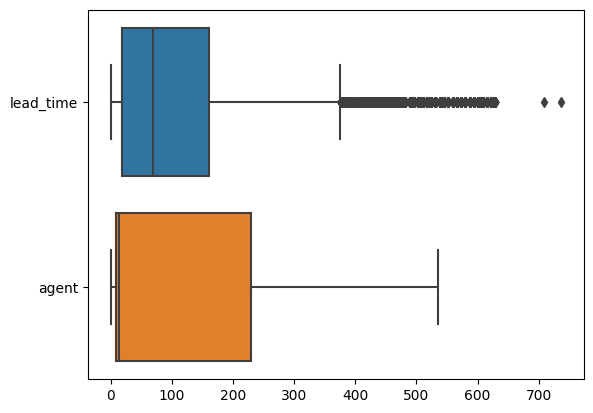

In [10]:
sb.boxplot(data=df[['lead_time','agent']], orient='h')

In [11]:
def remove_outliers(df, col_name):
    # remove outliers in lead_time
    Q1 = np.percentile(df[col_name], 25, method='midpoint')
    Q3 = np.percentile(df[col_name], 75, method='midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR

    #Below Lower bound
    lower=Q1-1.5*IQR
    df = df[((df[col_name]>=lower) & (df[col_name] <= upper))]
    return df

def boxplot(df, col_name):
    sb.boxplot( data = df[col_name], orient="h")

In [12]:
df = remove_outliers(df, 'lead_time')

In [13]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,revenue
0,Renaissance Hotel,0,342,2018,July,1,0,0,2,0.0,...,C,3,No Deposit,NaN,0,Transient,0.00,0,0,0.00
2,Renaissance Hotel,0,7,2018,July,1,0,1,1,0.0,...,C,0,No Deposit,NaN,0,Transient,75.00,0,0,75.00
3,Renaissance Hotel,0,13,2018,July,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.00,0,0,75.00
4,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,196.00
5,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,JW Marriott Hotel,0,23,2017,August,30,2,5,2,0.0,...,A,0,No Deposit,394.0,0,Transient,96.14,0,0,672.98
119386,JW Marriott Hotel,0,102,2017,August,31,2,5,3,0.0,...,E,0,No Deposit,9.0,0,Transient,225.43,0,2,1578.01
119387,JW Marriott Hotel,0,34,2017,August,31,2,5,2,0.0,...,D,0,No Deposit,9.0,0,Transient,157.71,0,4,1103.97
119388,JW Marriott Hotel,0,109,2017,August,31,2,5,2,0.0,...,A,0,No Deposit,89.0,0,Transient,104.40,0,0,730.80


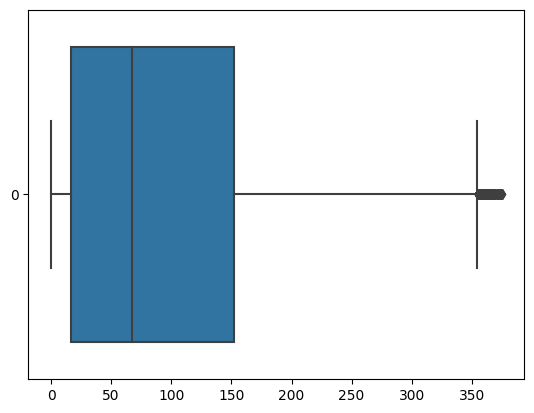

In [14]:
boxplot(df,'lead_time')

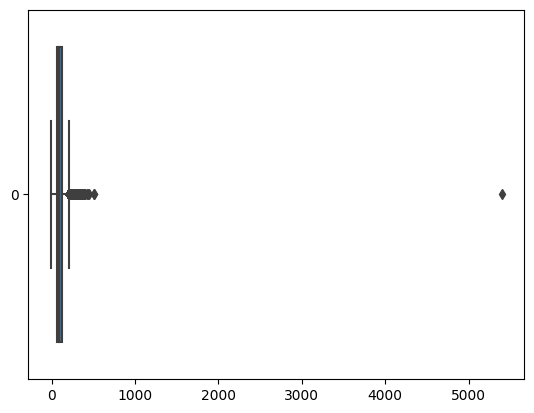

In [15]:
boxplot(df,'adr')

In [16]:
df = remove_outliers(df, 'adr')

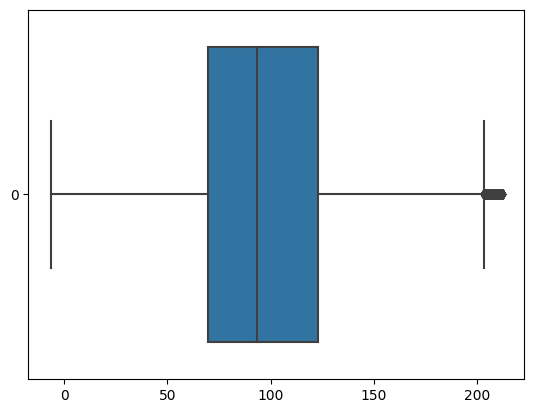

In [17]:
boxplot(df, 'adr')

C:\Users\saryn\AppData\Local\Temp\ipykernel_11216\912234535.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

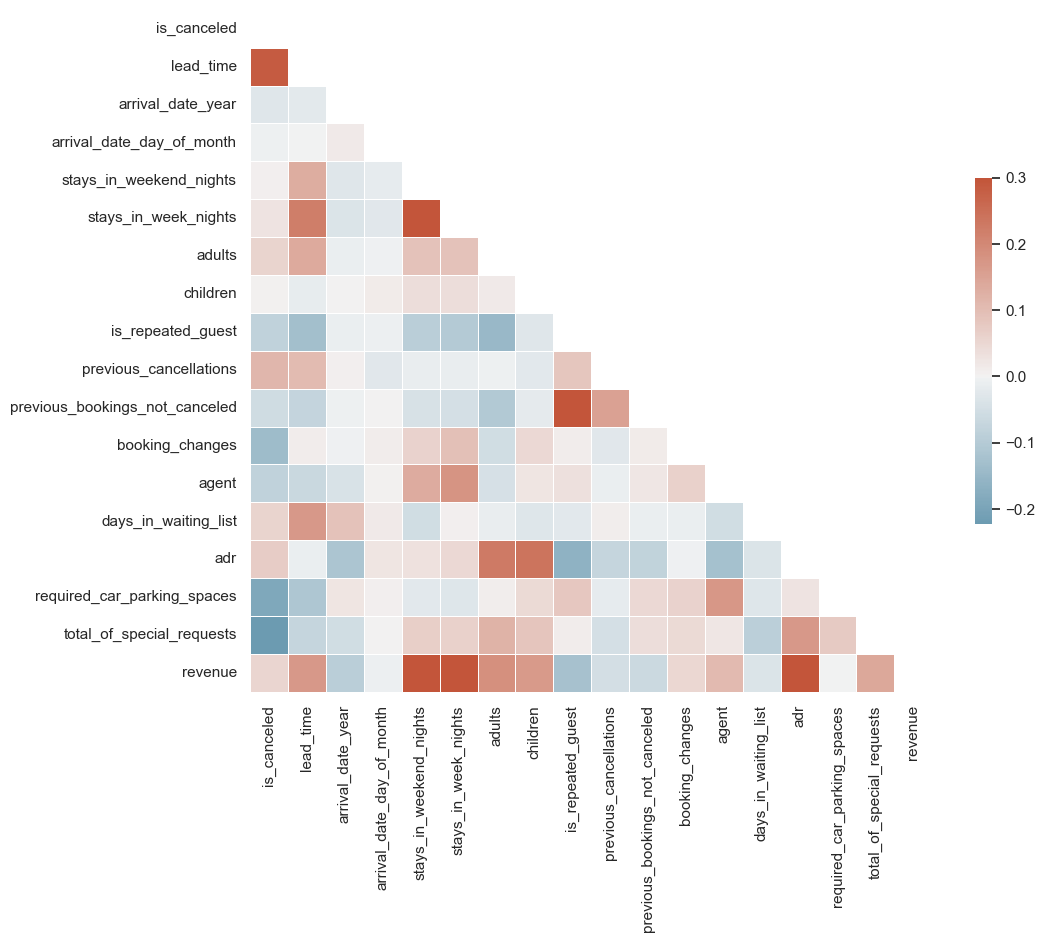

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

People who get children with them are more profitable to the hotel as there is a correlation between children and adr. (insight1)

Check the relation between the lead_time and is_cancelled.

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

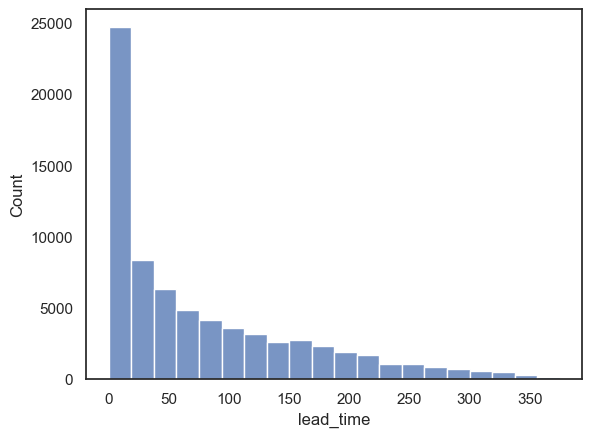

In [19]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='lead_time', bins=20)

We see from the histogram of the non-cancelled reservations: lead_time is shifted towards left or small number of days,
so : people don't tend to cancel when they reserved in date closer to the check in. (insight 2)

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

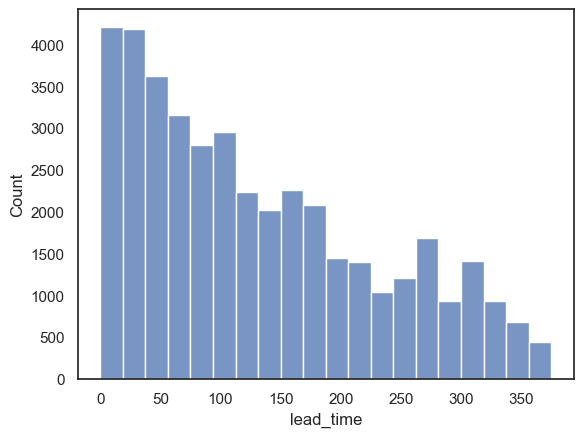

In [20]:
sns.histplot(data=df[(df['is_canceled'] == 1)], x='lead_time', bins=20)

If someone will cancel it's more likely he booked 100 days before the checkin. (insight 3)

Next, We want to see what are the months which are high in booking that are not cancelled.

<AxesSubplot: xlabel='Count', ylabel='arrival_date_month'>

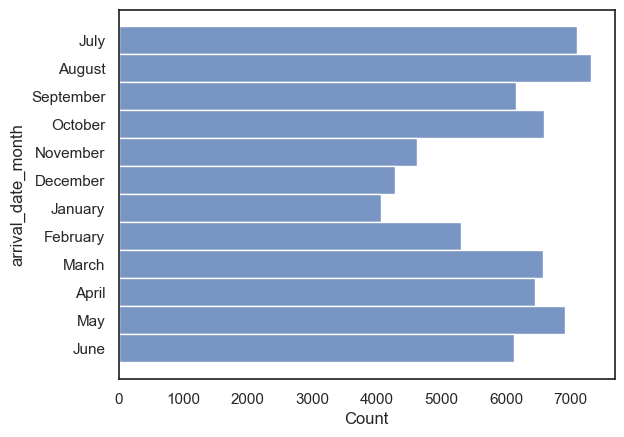

In [21]:
sb.histplot(data=df[(df['is_canceled']==0)], y='arrival_date_month')

May, July, August are the highest months that users book in. (insight 4)

Next what are the months which the user book in and cancel it.

<AxesSubplot: xlabel='Count', ylabel='arrival_date_month'>

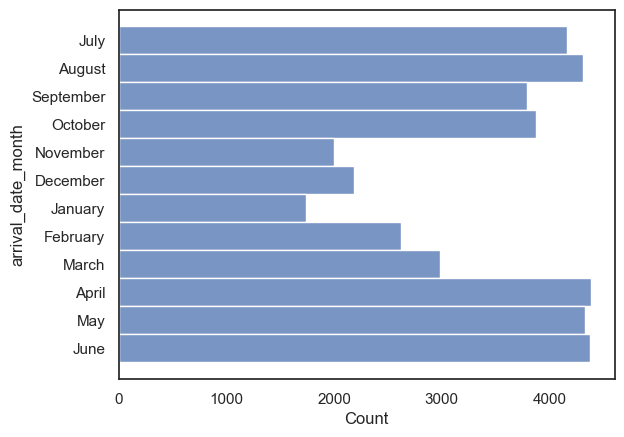

In [22]:
sb.histplot(data=df[(df['is_canceled']==1)], y='arrival_date_month')

April, May, June are the most months that the user book in and cancel. (insight 5)

Next see the relation between the deposit type and cancelation rate.

<AxesSubplot: xlabel='Count', ylabel='deposit_type'>

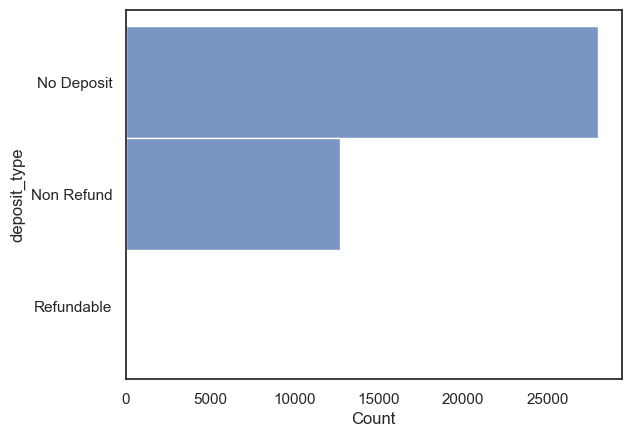

In [23]:
sb.histplot(data=df[(df['is_canceled']==1)], y='deposit_type')

We need to get the ratio between the number of people who choose No_deposit and cancelled bookings.

We need to get the ratio between the number of people who choose Non Refund and cancelled bookings.

In [24]:
nodeposit = len(df[(df['deposit_type'] == 'No Deposit')])
nonrefund = len(df[(df['deposit_type'] == 'Non Refund')])
nondepositeAndCancelled = len(df[(df['deposit_type'] == 'No Deposit') & (df['is_canceled']==1)])
nonreufndAndCancelled = len(df[(df['deposit_type'] == 'Non Refund') & (df['is_canceled']==1)])
print('No deposit users', nodeposit)
print('Non Refund users', nonrefund)
print('No deposit users & cancelled', nondepositeAndCancelled)
print('Non Refund users & cancelled', nonreufndAndCancelled)
print('ratio between No deposit users / No deposit users that cancelled = ', nondepositeAndCancelled/nodeposit)
print('ratio between Non Refund users / Non Refund users that cancelled = ', nonreufndAndCancelled/nonrefund)

No deposit users 99249
Non Refund users 12810
No deposit users & cancelled 27988
Non Refund users & cancelled 12718
ratio between No deposit users / No deposit users that cancelled =  0.2819978035043174
ratio between Non Refund users / Non Refund users that cancelled =  0.9928181108508978


There is a strange pattern that users that use deposit type as non refund tends to cancel more than users that don't add deposit.
The histogram and the ratio strengthen the pattern. (insight 6)

See which customers are more loyal to their hotel, and the next time any customer has this rule will be given a promotion.

In [25]:
loyal_customers = df[(df['previous_bookings_not_canceled'] > 3) & (df['previous_cancellations'] == 0)]
print('number of loyal customers till now', len(loyal_customers))

number of loyal customers till now 637


In [26]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [27]:
sc = SparkContext()
spark = SparkSession.builder.appName("Python Spark DataFrames basic example").config("spark.some.config.option", "some-value").getOrCreate()


In [28]:
sdf = spark.createDataFrame(df) 
sdf.createOrReplaceTempView("hotels_booking")
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- days_in_waiting_list: long (nu

In [29]:
# get the most repeated agencies with non cancelled bookings
command = '''
SELECT agent,COUNT(agent) as numberOfBookings
FROM hotels_booking
WHERE IsNan(agent) = 0
and is_canceled = 0
GROUP BY agent
ORDER BY numberOfBookings DESC
LIMIT 5'''
spark.sql(command).show()

+-----+----------------+
|agent|numberOfBookings|
+-----+----------------+
|  9.0|           18289|
|240.0|            7651|
|  7.0|            3007|
| 14.0|            2825|
|250.0|            2022|
+-----+----------------+



We have 3 agencies(9, 240, 7) that we can offer their users some promotions, as these agencies bring us huge number of visitors. (Promotion #1)

Let's get the users that have large difference between the not canceled bookings and canceled bookings.
Any further booking that contains these criteria we will give them promotions. as they are serious customers. (promotion #2)

In [30]:
command = '''
SELECT *,(previous_bookings_not_canceled-previous_cancellations) as loyality FROM hotels_booking
WHERE (previous_bookings_not_canceled-previous_cancellations) > 1
ORDER BY loyality
'''
spark.sql(command).show()

+-----------------+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+---------------+----+---------------------------+-------------------------+-------+--------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|  customer_type| adr|required_car_parking_spaces|total_of_special_requests|revenue|loyality|
+-----------------+-----------+---------+-----------------+------------------+------

Get the relation between number of stays in weekend and the adr

In [31]:
command = '''
SELECT AVG(adr),stays_in_weekend_nights FROM hotels_booking
GROUP BY stays_in_weekend_nights
ORDER BY AVG(adr) DESC
'''
spark.sql(command).show()

+------------------+-----------------------+
|          avg(adr)|stays_in_weekend_nights|
+------------------+-----------------------+
|102.97136640557002|                      3|
|100.33978077463851|                      2|
| 99.32376077438737|                      1|
| 95.35296342168262|                      0|
| 94.87544937428895|                      4|
| 88.64423076923079|                      5|
| 75.50893333333332|                      6|
| 70.05135593220338|                      8|
| 65.71818181818182|                      9|
| 61.05428571428571|                     10|
| 59.48736842105263|                      7|
|            25.786|                     12|
|20.876666666666665|                     16|
|14.036666666666667|                     13|
|               0.0|                     14|
+------------------+-----------------------+



Staying in the weekend 2 or 3 days are the most profitable to the hotel. (insight 7)

Let's discover the average adr according to the room type and what the type of rooms are more profitable

In [32]:
import plotly.express as pltx
pltx.box(data_frame = df[(df['is_canceled'] == 0)], x = 'reserved_room_type', y = 'adr', color = 'hotel')

Room of type H,L in Renaissance and H,F in JW Marriott are the highest in ADR. (insight 8)

Get the room types that are poorly booked.

<AxesSubplot: xlabel='reserved_room_type', ylabel='Count'>

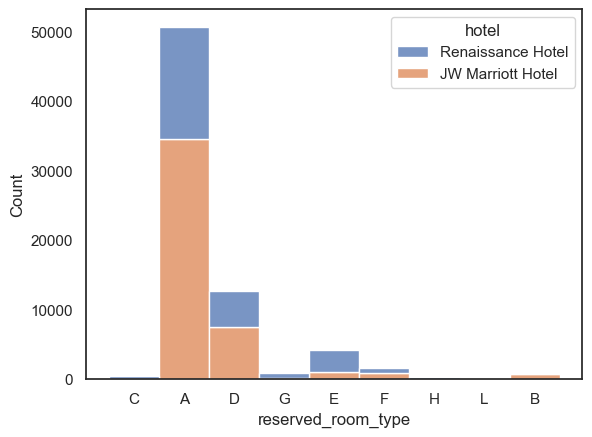

In [33]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='reserved_room_type', hue='hotel', multiple='stack')

In [34]:
command = '''
SELECT reserved_room_type, COUNT(reserved_room_type) as numberOfBookings
FROM hotels_booking
WHERE is_canceled = 0
GROUP BY reserved_room_type
ORDER BY numberOfBookings DESC
'''
spark.sql(command).show()


+------------------+----------------+
|reserved_room_type|numberOfBookings|
+------------------+----------------+
|                 A|           50667|
|                 D|           12636|
|                 E|            4219|
|                 F|            1591|
|                 G|             893|
|                 B|             744|
|                 C|             475|
|                 H|             248|
|                 L|               4|
+------------------+----------------+



We will do promotions on the room types (G,B,H,C,L) as they are the least booked. (promotion #3)

Get the average room price in each month for each hotel.

<AxesSubplot: xlabel='arrival_date_month'>

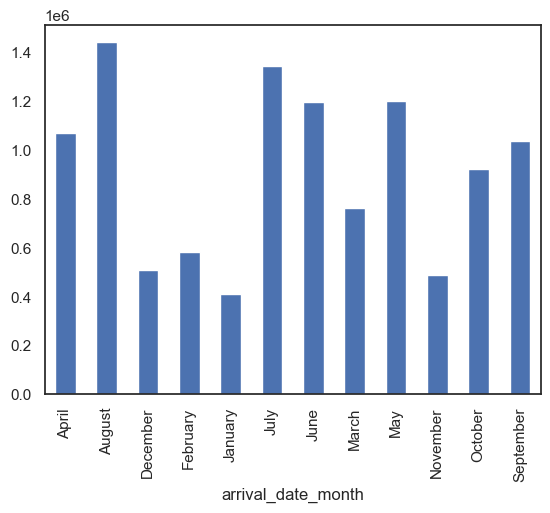

In [35]:
df.groupby('arrival_date_month')['adr'].sum().plot(kind='bar')

In [36]:
command = '''
SELECT arrival_date_month,
cast(AVG(adr) as numeric(36,2)) as `average adr in month`
FROM hotels_booking
GROUP BY arrival_date_month
ORDER BY AVG(adr) DESC
'''
spark.sql(command).show()

+------------------+--------------------+
|arrival_date_month|average adr in month|
+------------------+--------------------+
|            August|              124.01|
|              July|              119.32|
|              June|              114.12|
|               May|              107.00|
|         September|              104.51|
|             April|               98.82|
|           October|               88.23|
|             March|               80.01|
|          December|               78.76|
|          November|               74.00|
|          February|               73.50|
|           January|               70.62|
+------------------+--------------------+



August, July, June (summer months) are the highest in room prices. give promotion in these months to increase number of bookings. (promotion#4)

Visualize the total revenue in each month.

<AxesSubplot: xlabel='arrival_date_month'>

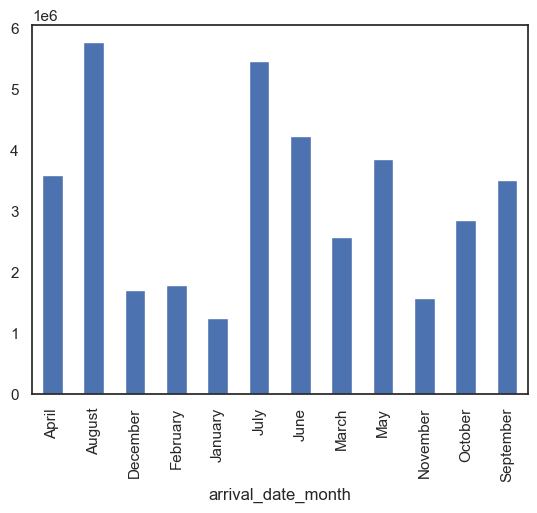

In [37]:
df.groupby('arrival_date_month')['revenue'].sum().plot(kind='bar')

In [38]:
command = '''
SELECT arrival_date_month,
cast(SUM(revenue) as numeric(36,2)) as total_revenue
FROM hotels_booking
GROUP BY arrival_date_month
ORDER BY total_revenue DESC
'''

spark.sql(command).show()

+------------------+-------------+
|arrival_date_month|total_revenue|
+------------------+-------------+
|            August|   5762979.20|
|              July|   5459542.45|
|              June|   4237506.51|
|               May|   3861586.17|
|             April|   3587618.59|
|         September|   3517364.52|
|           October|   2859488.43|
|             March|   2573893.03|
|          February|   1791505.29|
|          December|   1704144.09|
|          November|   1574526.55|
|           January|   1256240.03|
+------------------+-------------+



The most profitable months are August, July, June.(insight 11)

In [39]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,revenue
0,Renaissance Hotel,0,342,2018,July,1,0,0,2,0.0,...,C,3,No Deposit,NaN,0,Transient,0.00,0,0,0.00
2,Renaissance Hotel,0,7,2018,July,1,0,1,1,0.0,...,C,0,No Deposit,NaN,0,Transient,75.00,0,0,75.00
3,Renaissance Hotel,0,13,2018,July,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.00,0,0,75.00
4,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,196.00
5,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,JW Marriott Hotel,0,21,2017,August,30,2,5,2,0.0,...,A,0,No Deposit,394.0,0,Transient,96.14,0,2,672.98
119385,JW Marriott Hotel,0,23,2017,August,30,2,5,2,0.0,...,A,0,No Deposit,394.0,0,Transient,96.14,0,0,672.98
119387,JW Marriott Hotel,0,34,2017,August,31,2,5,2,0.0,...,D,0,No Deposit,9.0,0,Transient,157.71,0,4,1103.97
119388,JW Marriott Hotel,0,109,2017,August,31,2,5,2,0.0,...,A,0,No Deposit,89.0,0,Transient,104.40,0,0,730.80


In [45]:
# split the spark dataframe into train and test
train, test = sdf.randomSplit([0.7, 0.3], seed=12345)


In [47]:
# using SparkML to predict the cancellation
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.regression import LinearRegression

spark.udf.register("oneElementVec", lambda d: Vectors.dense([d]), returnType=VectorUDT())
exprs = [col(column).alias(column.replace(' ', '_')) for column in sdf.columns]
tdata = sdf.select(*exprs).selectExpr("oneElementVec(2014_Population_estimate) as features", "2015_median_sales_price as label")
display(tdata)


IllegalArgumentException: requirement failed: Column hotel must be of type class org.apache.spark.ml.linalg.VectorUDT:struct<type:tinyint,size:int,indices:array<int>,values:array<double>> but was actually class org.apache.spark.sql.types.StringType$:string.

In [ ]:
lr = LinearRegression(featuresCol='hotel', labelCol='is_canceled', maxIter=10, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(train, {lr.regParam:0.1})